In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading and Preprocessing

In [2]:
train_dir=r"C:\Users\Lenovo\OneDrive\Documents\Data set\Facial Expression\images\train"
validation_dir=r"C:\Users\Lenovo\OneDrive\Documents\Data set\Facial Expression\images\validation"

train_datagen=ImageGenerator: Define the image generator
for argument training image (rescaling,rotation, zooom,horizontal,)

vlaidation datagen= ImageGenrator =(Rescale):Deffine the image dta generatoer for validating with rescaling 

train_generator=train_datagen.flow_from_directory:Load and preprocessing validation images from the specified directiory 

In [ ]:
# -----------------------------------------
# IMAGE DATA GENERATOR FOR CNN TRAINING
# -----------------------------------------

# Import ImageDataGenerator to load and preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# -----------------------------------------
# 1. TRAIN DATA AUGMENTATION
# -----------------------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values from 0–255 to 0–1 (makes training stable)
    rotation_range=30,     # Randomly rotate images up to 20 degrees → helps model learn rotational variations
    zoom_range=0.3,        # Random zoom in/out up to 20% → improves robustness
     width_shift_range=0.2,
     height_shift_range=0.2,
      shear_range=0.2,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True   # Randomly flip image horizontally → prevents overfitting
)


# -----------------------------------------
# 2. VALIDATION DATA NO AUGMENTATION
# -----------------------------------------
# Only rescaling is done because validation images must remain unchanged
validation_datagen = ImageDataGenerator(
    rescale=1./255         # Convert pixel values to 0–1
)


# -----------------------------------------
# 3. TRAIN GENERATOR
# -----------------------------------------
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # Path of training folder (must contain subfolders for each class)
    target_size=(96, 96),      # Resize all images to 96×96 pixels
    batch_size=64,             # Train with batches of 64 images at a time
    class_mode='categorical',  # Multi-class classification → output one-hot encoded labels
    color_mode='grayscale'     # Convert images to grayscale (1 channel instead of 3)
)


# -----------------------------------------
# 4. VALIDATION GENERATOR
# -----------------------------------------
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,            # Path of validation folder
    target_size=(96, 96),      # Resize validation images
    batch_size=64,             # Same batch size for consistency
    class_mode='categorical',  # Same classification type
    color_mode='grayscale'     # Convert validation images to grayscale
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# EDA

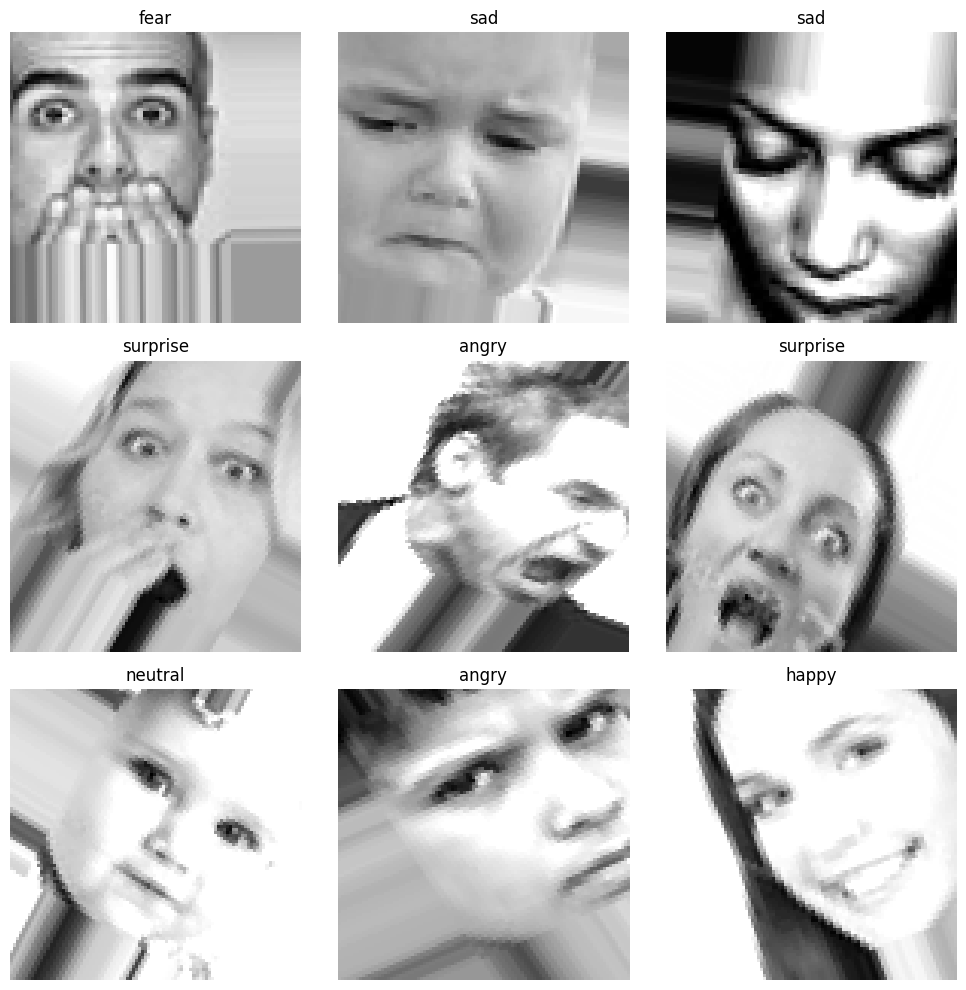

In [16]:
images,labels=next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(96, 96), cmap='gray')
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


# CNN Architecture 

conv2D: Applies a 2d convultional operation to input data(like an image) to extraxt feature using filter and kernels 

MAxPooling2D: performing max pooling to  reduce the spatial dimension (hieght and width) of the input while remaing the most imortant feature 

flattern : comvert multidimensional input into a one dimensional vector 

In [17]:
model=Sequential([
    # BLOCK 1
    Conv2D(64, (3,3), activation='relu', input_shape=(96,96,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

     # BLOCK 2
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # BLOCK 3
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    # BLOCK 4
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

        # FLATTEN
    Flatten(),       # change multi to single dimensional 

     # DENSE LAYERS
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(7, activation='softmax'),
    
])

optimizer = Adam(learning_rate=0.0001)   # 🔥 BEST LR FOR HIGH ACCURACY

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

model.summary()


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 94, 94, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 94, 94, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,065,863 (11.70 MB)

 Trainable params: 3,063,431 (11.69 MB)

 Non-trainable params: 2,432 (9.50 KB)

# Model TRaining

In [20]:

#callback
early_stopping=EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
lr_sheduler=ReduceLROnPlateau(monitor='val_loss',patience=5, restore_best_weights=True)



# Model Training
history=model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping,lr_sheduler]
    
)


Epoch 1/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 1124s 2s/step - accuracy: 0.1775 - loss: 2.4117 - val_accuracy: 0.2380 - val_loss: 1.8590 - learning_rate: 1.0000e-04
Epoch 2/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 890s 2s/step - accuracy: 0.1933 - loss: 2.2114 - val_accuracy: 0.2652 - val_loss: 1.7988 - learning_rate: 1.0000e-04
Epoch 3/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.2069 - loss: 2.1220 - val_accuracy: 0.2822 - val_loss: 1.7929 - learning_rate: 1.0000e-04
Epoch 4/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 890s 2s/step - accuracy: 0.2220 - loss: 2.0574 - val_accuracy: 0.2703 - val_loss: 1.7758 - learning_rate: 1.0000e-04
Epoch 5/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 918s 2s/step - accuracy: 0.2245 - loss: 2.0196 - val_accuracy: 0.3307 - val_loss: 1.7077 - learning_rate: 1.0000e-04


# Evaluaton- CLassification amd Confussion MAtrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classific

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         7
     disgust       0.00      0.00      0.00         3
        fear       0.00      0.00      0.00        10
       happy       0.35      0.82      0.49        17
     neutral       0.50      0.15      0.24        13
         sad       0.50      0.09      0.15        11
    surprise       0.19      1.00      0.32         3

    accuracy                           0.31        64
   macro avg       0.22      0.30      0.17        64
weighted avg       0.29      0.31      0.22        64



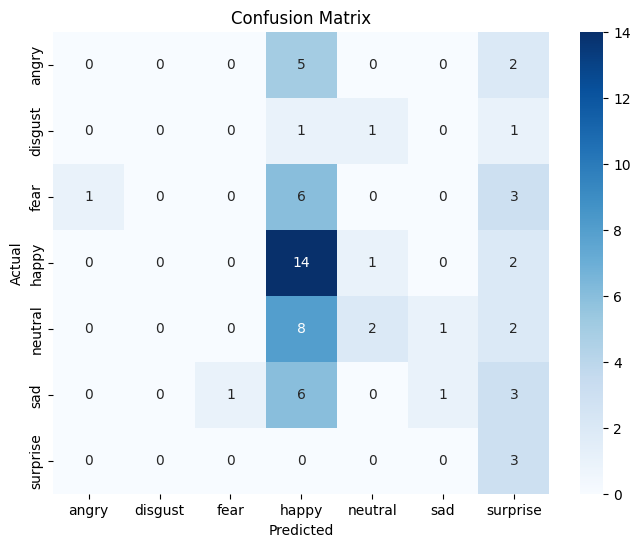

In [21]:
# 6. Evaluation - Classification Report & Confusion Matrix
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Detection System

In [24]:
print(model.input_shape)


(None, 96, 96, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


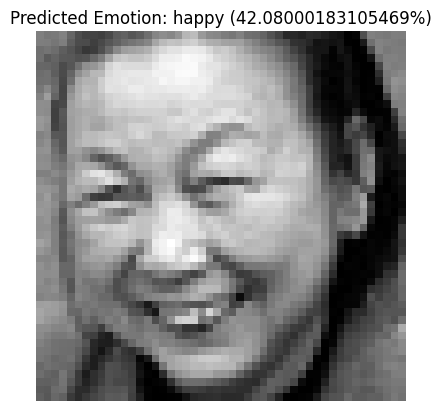

Emotion: happy, Confidence: 42.08000183105469%


In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def detect_emotion(image_path):
    img = image.load_img(image_path, target_size=(96, 96), color_mode='grayscale')
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_names[predicted_index]
    confidence = round(prediction[0][predicted_index] * 100, 2)  # Confidence in %

    # Display the image with the predicted label and confidence
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Example Detection
predicted_emotion, confidence = detect_emotion(r"C:\Users\Lenovo\OneDrive\Documents\Data set\Facial Expression\images\train\happy\99.jpg")
print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")

In [26]:
# Save Model
model.save('Facial_emotion_detection_model.h5')